In [1]:
import pandas as pd
import numpy as np
    
# reading behavioral scores:
#subject_behav = pd.read_csv("data/result01_pnc_data.csv", delimiter = ",")
# read file with FA components:
subject_behav = pd.read_csv("data/pnc_cognitive_response.csv", delimiter = ",")
#subject_behav = pd.read_csv("data/result01_pnc_data_merge.csv", delimiter = ",")
# print("subject_behav:")
# print(subject_behav[0:5])

#print(subject_info_behav[subject_info_behav.duplicated(subset = "SUBJID", keep = False)])

# accuracy_col = [
#     "ABF_A_ar_z", "ATT_A_ar_z", "WM_A_ar_z", 
#     "VMEM_A_ar_z", "FMEM_A_ar_z", "SMEM_A_ar_z", 
#     "LAN_A_ar_z", "NVR_A_ar_z", "SPA_A_ar_z", 
#     "EID_A_ar_z", "EDI_A_ar_z", "ADI_A_ar_z"]

# speed_col = [
#     "ABF_S_ar_z", "ATT_S_ar_z", "WM_S_ar_z", 
#     "VMEM_S_ar_z", "FMEM_S_ar_z", "SMEM_S_ar_z", 
#     "LAN_S_ar_z", "NVR_S_ar_z", "SPA_S_ar_z", 
#     "EID_S_ar_z", "EDI_S_ar_z", "ADI_S_ar_z", 
#     "MOT_S_ar_z", "SM_S_ar_z"]

# cog_score_label = accuracy_col + speed_col


cog_label_acc = [
    # executive control:
    "pcet_acc2",
    "pcpt_t_tp",
    "lnb_tp2",
    # episodic memory task:
    "pwmt_kiwrd_tot",
    "pfmt_ifac_tot",
    "volt_svt",
    # complex cognitive task:
    "pvrt_cr",
    "pmat_cr",
    "plot_tc",
    # social cognition task:
    "peit_cr",
    "pedt_a",
    "padt_a"
]

cog_label_speed = [
    # executive control:
    "pcet_rtcr",
    "pcpt_t_tprt",
    "lnb_rtc2",
    # episodic memory task:
    "pwmt_kiwrd_rtc",
    "pfmt_ifac_rtc",
    "volt_svtcrt",
    # complex cognitive task:
    "pvrt_rtcr",
    "pmat_rtcr",
    "plot_tcrt",
    # social cognition task:
    "peit_crt",
    "pedt_t",
    "padt_t",
    # sensorimotor speed task:
    "mp_mp2rtcr",
    "tap_tot"
]

cog_label_acc2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI"
]

cog_label_speed2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI",
    # sensorimotor speed task:
    "MOT",
    "SM"
]

cog_label = cog_label_acc + cog_label_speed
cog_label2 = [s + '_Accuracy' for s in cog_label_acc2] + [s + '_Speed' for s in cog_label_speed2]

#print(subject_info_behav[["mp_mp2rtcr", "tap_tot"]])
# revert the speed cognitive scores:
subject_behav[cog_label_speed] = subject_behav[cog_label_speed]*(-1)

scatter_ridge = pd.read_csv("result/allsubjects/out02_scatter_data_gender_ridge.csv", delimiter = ",")
scatter_svr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_svr.csv", delimiter = ",")
scatter_gpr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_gpr.csv", delimiter = ",")
scatter_dnn = pd.read_csv("result/allsubjects/out02_scatter_data_gender_dnn.csv", delimiter = ",")

# feature_name = 'GMV&rsfMRI'
#feature_name = 'GMV&DTI'
feature_name = 'Multi-modal'

In [2]:
def behav_correlation(subject_behav, scatter_data, cog_score_label, corr_label):
    scatter_data = scatter_data.loc[scatter_data['feature'] == feature_name]

    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = "SUBJID")
    subject_behav['age gap corr'] = subject_behav['brain age'] - subject_behav['brain age fit']
    # print(subject_behav_ridge[0:5])
    print(subject_behav.shape)
    
    # pd.DataFrame.corr() is nan compatible:
    corr_mat = subject_behav[corr_label + cog_score_label].corr()
    return((corr_mat.iloc[0, 1:]))

In [3]:
age_gap_behavacc_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])
corr_label = ['age gap corr']

age_gap_behavacc_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_acc, corr_label)
age_gap_behavacc_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_acc, corr_label)
age_gap_behavacc_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_acc, corr_label)
age_gap_behavacc_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_acc, corr_label)

age_gap_behavacc_corr.index = cog_label_acc2
print(age_gap_behavacc_corr)


(604, 160)
(604, 160)
(604, 160)
(604, 161)
         ridge       SVR       GPR       DNN
ABF  -0.068002 -0.066386 -0.070194 -0.065111
ATT  -0.004122  0.005135  0.007349 -0.009037
WM   -0.013935 -0.014270 -0.011447 -0.043360
VMEM  0.008994 -0.014471  0.003128 -0.002439
FMEM  0.008497  0.002764  0.005859 -0.015646
SMEM -0.045690 -0.018309 -0.035314 -0.054291
LAN  -0.081277 -0.076707 -0.072887 -0.079689
NVR  -0.030722 -0.026175 -0.029200 -0.044563
SPA  -0.038197 -0.050174 -0.035420 -0.046383
EID  -0.004896  0.006853 -0.000047 -0.010753
EDI   0.012341  0.017809  0.017769  0.021646
ADI   0.036542  0.024348  0.036799  0.036757


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = age_gap_behavacc_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score accuracy', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score accuracy", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Age gap corr")

Text(0.5,1,'Age gap corr')

In [5]:
age_gap_behavspeed_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])
corr_label = ['age gap corr']

age_gap_behavspeed_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_speed, corr_label)
age_gap_behavspeed_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_speed, corr_label)
age_gap_behavspeed_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_speed, corr_label)
age_gap_behavspeed_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_speed, corr_label)

age_gap_behavspeed_corr.index = cog_label_speed2
print(age_gap_behavspeed_corr)


(604, 160)
(604, 160)
(604, 160)
(604, 161)
         ridge       SVR       GPR       DNN
ABF  -0.068573 -0.038861 -0.063812 -0.059646
ATT   0.017663  0.015482  0.020438  0.027436
WM    0.056077  0.047797  0.055309  0.033868
VMEM  0.012152  0.012244  0.013706 -0.001801
FMEM  0.057007  0.081540  0.065370  0.044538
SMEM  0.055418  0.083808  0.064037  0.060203
LAN   0.027425  0.037943  0.037192  0.023907
NVR   0.061475  0.028757  0.067756  0.038609
SPA  -0.022247  0.017278 -0.019864 -0.010793
EID   0.010458  0.023559  0.005249  0.002068
EDI   0.046633  0.032790  0.038872  0.050665
ADI   0.011373  0.011312  0.006519  0.011405
MOT  -0.029982 -0.014908 -0.024042 -0.027281
SM   -0.039311 -0.032381 -0.036326 -0.044670


Text(0.5,1,'Age gap corr')

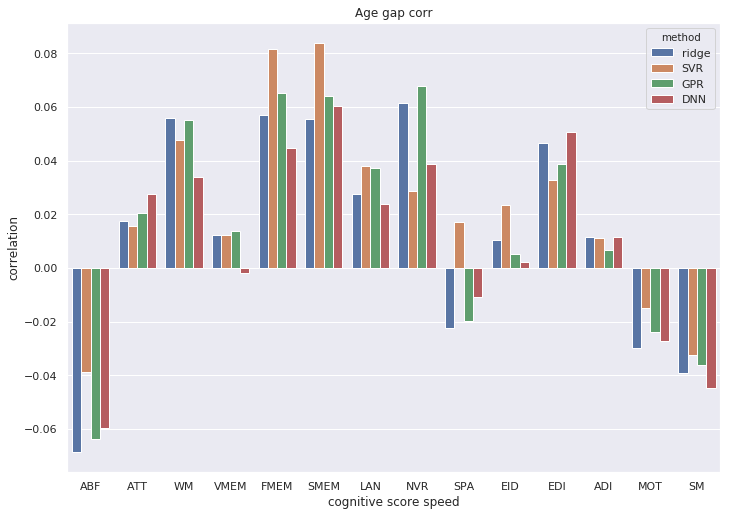

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = age_gap_behavspeed_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score speed', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score speed", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Age gap corr")

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


def linear_regression_rfe(subject_behav, scatter_data, cog_score_label, 
                          y_label, n_features = 5, save_data = False):    
    
    scatter_data = scatter_data.loc[scatter_data['feature'] == feature_name]

    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = ["SUBJID", "Sex"])
    
    subject_behav['age gap corr'] = subject_behav['brain age'] - subject_behav['brain age fit']
    subject_behav['age gap'] = subject_behav['brain age'] - subject_behav['chronological age']
    # print(any(np.isnan(y)))
    # print(any(np.isnan(X)))
    subject_behav_tosave = subject_behav[ ["SUBJID", 'Sex', 'chronological age', 'age gap corr', 
                                           'age gap', 'brain age', 'brain age fit'] + cog_score_label]
    
    if y_label == 'age gap':
        print('add chronological age as predictors...')
        cog_score_label = cog_score_label + ['chronological age']
    elif y_label == 'age gap corr':
        print('add chronological age as predictors...')
        cog_score_label = cog_score_label + ['chronological age']
#     elif y_label == 'brain age':
#         print('add brain age fit as predictors...')
#         cog_score_label = cog_score_label + ['brain age fit']
    else:
        cog_score_label = cog_score_label
        
    X_label = cog_score_label + ["Sex"]
    
    subject_behav.replace({'Sex': {'F': 0, 'M': 1}}, inplace = True)
    X = subject_behav[X_label].values
    y = subject_behav[y_label].values

    nan_idx = np.isnan(X).any(axis=1)
    y = y[~nan_idx]
    X = X[~nan_idx,:]
    X_scaled = preprocessing.scale(X)

    estimator = LinearRegression()
    #selector = RFECV(estimator, step=1, cv=5,  min_features_to_select=5)
    selector = RFECV(estimator, step=1, cv=5)
    #selector = RFE(estimator, step=1, n_features_to_select=n_features)
    
    selector = selector.fit(X_scaled, y)
    
    #print(selector.support_)
    #print(selector.ranking_)

    coefs = selector.estimator_.coef_
#     print(coefs)
    index = selector.support_
    label = [X_label[i] for i in range(len(X_label)) if index[i]]
#     print(label)
    
    rsquared = selector.score(X_scaled, y)
    
    coefs = pd.DataFrame(coefs, index = label, columns = ['beta'])
    
    if save_data:
        return((coefs, rsquared, subject_behav_tosave))
    else:
        return((coefs, rsquared))


In [8]:
brainage_behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
brainage_behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

column_name1 = ["SUBJID", 'Sex', 'chronological age', 'age gap corr', 'age gap', 'brain age', 'brain age fit'] 

coefs_ridge, brainage_behav_rsquare.loc['rsquared','ridge'], subject_behav_ridge = \
linear_regression_rfe(subject_behav, scatter_ridge,cog_label, y_label = 'brain age',save_data = True)

subject_behav_ridge.columns = column_name1  + cog_label2
subject_behav_ridge.to_csv('result/allsubjects/out03_subject_behav_ridge'+feature_name+'.csv', index = False)


coefs_svr, brainage_behav_rsquare.loc['rsquared','SVR'], subject_behav_svr = \
linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'brain age', save_data = True)

subject_behav_svr.columns = column_name1 + cog_label2
subject_behav_svr.to_csv('result/allsubjects/out03_subject_behav_svr'+feature_name+'.csv', index = False)


coefs_gpr, brainage_behav_rsquare.loc['rsquared','GPR'], subject_behav_gpr = \
linear_regression_rfe(subject_behav, scatter_gpr,cog_label, y_label = 'brain age', save_data = True)

subject_behav_gpr.columns = column_name1  + cog_label2
subject_behav_gpr.to_csv('result/allsubjects/out03_subject_behav_gpr'+feature_name+'.csv', index = False)


coefs_dnn, brainage_behav_rsquare.loc['rsquared','DNN'], subject_behav_dnn = \
linear_regression_rfe(subject_behav, scatter_dnn,cog_label, y_label = 'brain age', save_data = True)

subject_behav_dnn.columns = column_name1 + cog_label2
subject_behav_dnn.to_csv('result/allsubjects/out03_subject_behav_dnn'+feature_name+'.csv', index = False)


coefs_chro, brainage_behav_rsquare.loc['rsquared','Chronological age'], subject_behav_dnn = \
linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'chronological age', save_data = True)

brainage_behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], 
                                keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])


brainage_behav_coef = brainage_behav_coef
brainage_behav_rsquare = brainage_behav_rsquare
print(brainage_behav_coef)
print(brainage_behav_rsquare)

                                      beta
ridge             pcpt_t_tp       0.337922
                  padt_a          0.774670
                  pcpt_t_tprt     0.757658
                  tap_tot        -0.735759
                  Sex            -0.438483
SVR               pcpt_t_tp       0.308709
                  padt_a          0.706162
                  pcpt_t_tprt     0.687289
                  tap_tot        -0.655790
                  Sex            -0.423756
GPR               pcpt_t_tp       0.365370
                  padt_a          0.797420
                  pcpt_t_tprt     0.783554
                  tap_tot        -0.730797
                  Sex            -0.427731
DNN               pcpt_t_tp       0.321687
                  padt_a          0.846871
                  pcpt_t_tprt     0.795400
                  tap_tot        -0.745670
                  Sex            -0.412702
Chronological age pcet_acc2      -0.172720
                  pcpt_t_tp       0.321432
           

In [9]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], axis = 1, 
                       keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'], sort = False)

behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, brainage_behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)

#rows.insert(0, rows.pop(rows.index('chronological age')))
#rows.insert(0, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv('result/allsubjects/brain_age_behav_coef'+feature_name+'.csv')

                  ridge       SVR       GPR       DNN  Chronological age
ATT_Accuracy   0.337922  0.308709   0.36537  0.321687           0.321432
ADI_Accuracy    0.77467  0.706162   0.79742  0.846871           0.808549
ATT_Speed      0.757658  0.687289  0.783554    0.7954           0.826954
SM_Speed      -0.735759  -0.65579 -0.730797  -0.74567          -0.689319
Sex           -0.438483 -0.423756 -0.427731 -0.412702          -0.363136
ABF_Accuracy        NaN       NaN       NaN       NaN          -0.172720
VMEM_Accuracy       NaN       NaN       NaN       NaN          -0.194617
LAN_Accuracy        NaN       NaN       NaN       NaN           0.383421
NVR_Accuracy        NaN       NaN       NaN       NaN          -0.128328
SPA_Accuracy        NaN       NaN       NaN       NaN           0.218533
EDI_Accuracy        NaN       NaN       NaN       NaN           0.509026
VMEM_Speed          NaN       NaN       NaN       NaN           0.407453
FMEM_Speed          NaN       NaN       NaN       N

Text(0.5,1,'Brain age')

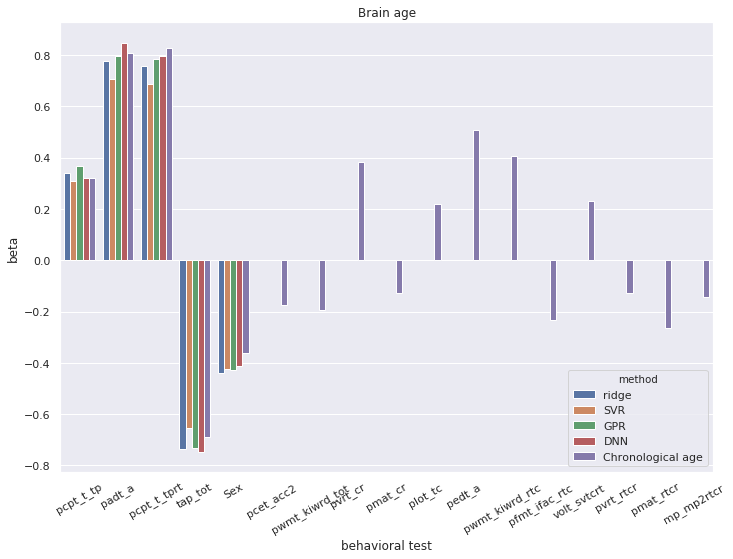

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

age_gap_behav_coef = brainage_behav_coef.drop(index='chronological age', level = 1)
age_gap_behav_coef.index.names = ['method', 'behavioral test']
age_gap_behav_coef = age_gap_behav_coef.reset_index()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test', y = "beta", hue = 'method', data = age_gap_behav_coef)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Brain age")

# regression RFE for corrected brain age gap:

In [11]:
behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

coefs_ridge, behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label, y_label = 'age gap corr')
coefs_svr, behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'age gap corr')
coefs_gpr, behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label, y_label = 'age gap corr')
coefs_dnn, behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'age gap corr')


add chronological age as predictors...
add chronological age as predictors...
add chronological age as predictors...
add chronological age as predictors...


In [12]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn], axis = 1, 
                       keys = ['ridge', 'SVR', 'GPR', 'DNN'], sort = False)

behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)

#rows.insert(0, rows.pop(rows.index('chronological age')))
#rows.insert(0, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv('result/allsubjects/agegapcorr_behav_coef'+feature_name+'.csv')

              ridge        SVR        GPR        DNN
Sex       -0.200521  -0.208843  -0.187245  -0.167936
rsquared  0.0200394  0.0252644  0.0179757  0.0127885


In [13]:
plot_data = agegap_behav_coef.reset_index()

plot_data = pd.melt(plot_data, id_vars = ['index'], value_vars = ['ridge', 'SVR', 'GPR', 'DNN'], 
                    var_name = 'Method', value_name = 'beta')
plot_data.rename(columns = {'index':'behavioral test'}, inplace = True)

Text(0.5,1,'Age gap corr')

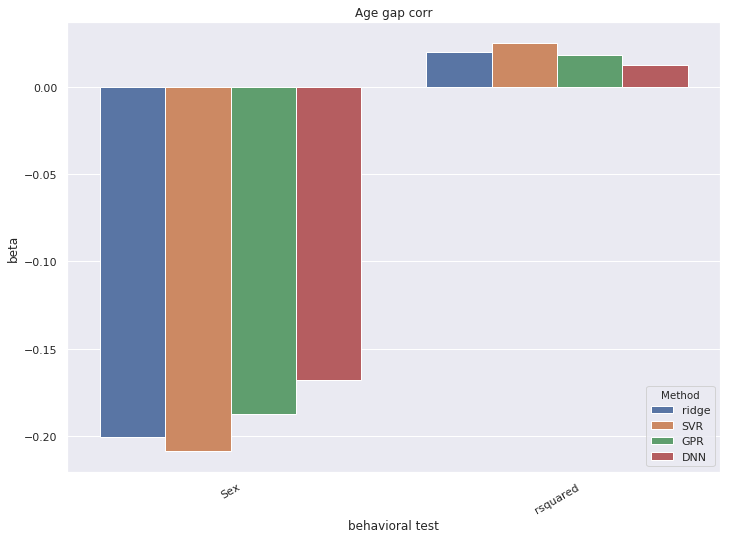

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test', y = "beta", hue = 'Method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Age gap corr")

# predict fitted brain age with behavioral scores

In [15]:
behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])
#behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

coefs_ridge, behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label, y_label = 'brain age fit')
coefs_svr, behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'brain age fit')
coefs_gpr, behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label, y_label = 'brain age fit')
coefs_dnn, behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'brain age fit')

coefs_chro, behav_rsquare.loc['rsquared','Chronological age'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'chronological age')


In [16]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], axis = 1, 
                       keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'], sort = False)

behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)

#rows.insert(0, rows.pop(rows.index('chronological age')))
rows.insert(0, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv('result/allsubjects/brain_age_fit_behav_coef'+feature_name+'.csv')

                   ridge       SVR        GPR       DNN Chronological age
Sex            -0.259891 -0.232531  -0.265436 -0.265515         -0.363136
ABF_Accuracy   -0.111631       NaN  -0.114468       NaN          -0.17272
ATT_Accuracy    0.232903  0.247537   0.238067   0.28322          0.321432
VMEM_Accuracy  -0.124262       NaN  -0.127414       NaN         -0.194617
LAN_Accuracy    0.328255  0.286846   0.333375  0.324759          0.383421
NVR_Accuracy  -0.0903106       NaN  -0.092143       NaN         -0.128328
SPA_Accuracy    0.180437       NaN   0.183065       NaN          0.218533
EDI_Accuracy    0.205842       NaN   0.215111       NaN          0.509026
ADI_Accuracy    0.535609  0.636507   0.549244  0.738872          0.808549
ABF_Speed     -0.0424844       NaN -0.0433319       NaN               NaN
ATT_Speed       0.656765  0.646437   0.668675  0.735151          0.826954
VMEM_Speed      0.329985       NaN   0.335781       NaN          0.407453
FMEM_Speed     -0.173628       NaN  -0

In [17]:
plot_data = agegap_behav_coef.reset_index()

plot_data = pd.melt(plot_data, id_vars = ['index'], value_vars = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'], 
                    var_name = 'Method', value_name = 'beta')
plot_data.rename(columns = {'index':'behavioral test'}, inplace = True)

Text(0.5,1,'Brain age fit')

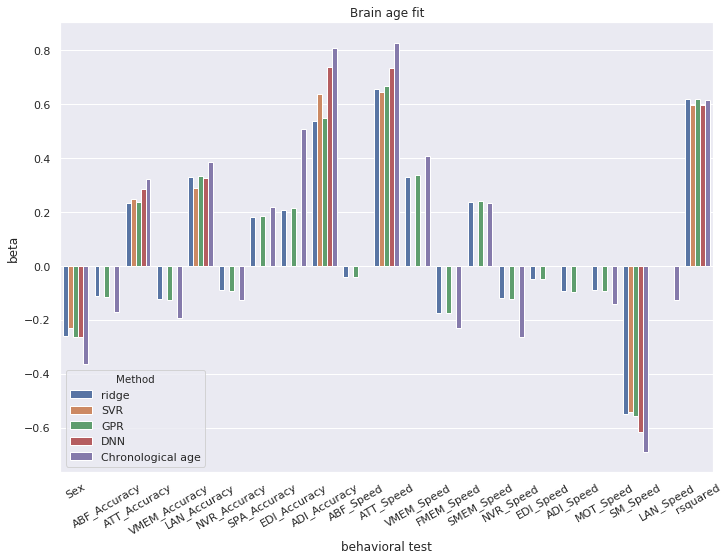

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test', y = "beta", hue = 'Method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Brain age fit")